<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/Assigment_1_Session_3_s8091335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

For all tasks in Session 3, Pandas, Seaborn, and Matplotlib libraries are good to go with.
The code above imports and uses the get_python function to reset the current environment. It is optional.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First, import Pandas and assign its alias of "pd".

Import Seaborn and assign its alias of "sns".

Import Matplotlib and assign its alias of "plt".

In [ ]:
# Read the input dataset
df = pd.read_excel('Food_dataset.xlsx')

The input dataset is called from the local machine. The directory and methods might vary in other cases.

Assign the dataframe from the dataset to the variable "df".

In [ ]:
# 1. Count the number of columns
total_cols = len(df.columns)
print(f'1. The dataset has {total_cols} columns.')

1. The dataset has 18 columns.


len() function returns the number of items within an object (i.e. a string).
df.columns() function returns the list of columns within df dataframe (the dataset). Therefore, we can combine two functions, first get the list of columns, then count the number of items within that list.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In practice, there is only the column which contains datetime only. So, it is a good practice to convert the "Date" column into datetime objects for further use. In this assignment, the datetime was hashed and transformed.

In [ ]:
df['Year'] = df['Year'].astype(int)

The value in "Year" column is string data type, so it should be converted into integer data type to calculate.

In [ ]:
df['Profit'] = df['total sales '] - df['total cost']

Create new column called "Profit". Its values are calculated by subtracting "total cost" column by the "total sales " column.

In [ ]:
# 2. Profit each year: $
annual_profit = df.groupby('Year')['Profit'].sum().apply(lambda x: round(x, 2)).reset_index()
print(f'2. Profit each year: \n{annual_profit}')

2. Profit each year: $
   Year     Profit
0  2020   94814.40
1  2021  975269.95


Multiple functions are use:

1. First, use the groupby() function to group the values in "Profit" column by groups in "Year" column.
2. Then, use the sum() function to sum up the total profit value in each group of year.
3. Next, use the apply(lambda x: y) to enable the round() function to round the results (the profits) to 2 decimal places.
4. Finally, use the reset_index() function to reset the index to the "Year" colum (in the new dataframe).

The result contains in the new dataframe called "annual_profit".

In [ ]:
# 3. Profit each location:
local_profit = df.groupby('suplier location ')['Profit'].sum().apply(lambda x: round(x, 2)).reset_index()
print(f'3. Profit each location: \n{local_profit}')

3. Profit each location: 
                  suplier location      Profit
0                              NSW   130720.78
1                Northern Territory  105652.37
2                        Queensland  217075.36
3                  South Australia   135775.69
4                          Tasmania  176907.82
5  The Australian Capital Territory  128669.39
6                               VIC    1501.55
7                Western Australia   173781.38


Multiple functions are used in the same convention above. The result contains in the new dataframe called "local_profit".

In [ ]:
# 4. Monthly sales in each location:
monthly_sales = df.groupby(['suplier location ','Year', 'Month Number'])['total sales '].sum().apply(lambda x: round(x, 2)).reset_index()
print(f'4. Monthly sales in each location: \n{monthly_sales}')

4. Monthly sales in each location: 
      suplier location   Year  Month Number  total sales 
0                  NSW   2020             1       3870.40
1                  NSW   2020             6       9355.50
2                  NSW   2020             8      14105.88
3                  NSW   2020            10       1747.20
4                  NSW   2021             1      49051.97
..                  ...   ...           ...           ...
98   Western Australia   2021             8      91101.98
99   Western Australia   2021             9     156252.86
100  Western Australia   2021            10     403655.56
101  Western Australia   2021            11      51681.55
102  Western Australia   2021            12     163568.55

[103 rows x 4 columns]


Multiple functions are used in the same convention above. Instead of using one column, this groupby function uses 3 columns in the order of location (suplier location), year (Year), and month (Month Number). The result contains in the new dataframe called "monthly_sales".

Because the assigment requires to get data of the year 2017, which is not available, the data is grouped, analyzed as two groups of the year 2021 and 2022.

In [ ]:
df_2020 = df[df['Year'] == 2020]
sum_items_2020 = df_2020['Item'].count()
number_items_2020 = df_2020['Item'].nunique()
item_2020 = df_2020['Item'].value_counts().reset_index()
print(f'5a. {sum_items_2020} items of {number_items_2020} products were sold in 2020: \n {item_2020}')

5a. 22 items of 17 products were sold in 2020: 
              index  Item
0          Oranges     2
1          Bananas     2
2          Lettuce     2
3         Tomatoes     2
4           Apples     2
5             Eggs     1
6             Beef     1
7           Yogurt     1
8       Sour cream     1
9   Cottage cheese     1
10       Mushrooms     1
11          Cheese     1
12           Milk      1
13        Cucumber     1
14          Celery     1
15          Squash     1
16     Wild Salmon     1


Create a new dataframe "df_2020" from the current dataframe "df" by using the filter condition "== 2020". First, the count() function is used to get the total number of items. Then, the nunique() function is used to get the number of distinct products. Last, the value_count() is used to create a new dataframe, storing the number of each distinct products.

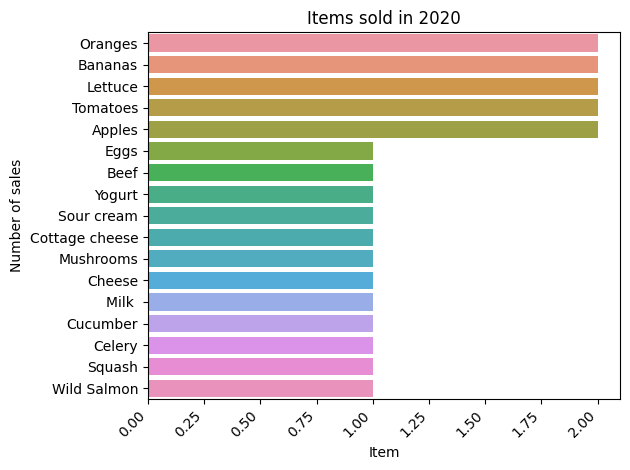

In [ ]:
# Create the bar chart using Seaborn
sns.barplot(x = item_2020['Item'],y = item_2020['index'],data = df)
# Set labels and title
plt.xlabel('Item')
plt.ylabel('Number of sales')
plt.title('Items sold in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the chart
plt.show()

The Seaborn library creates a colorful bar chart. The sns.barplot() function has 3 argument: x axis, y axis, and the source data (dataframe). The Matplotlib's functions are used to set the title, labels, and the layout of the plot.

In [ ]:
df_2021 = df[df['Year'] == 2021]
sum_items_2021 = df_2021['Item'].count()
number_items_2021 = df_2021['Item'].nunique()
item_2021 = df_2021['Item'].value_counts().reset_index()
print(f'5b. {sum_items_2021} items of {number_items_2021} products were sold in 2020: \n {item_2021}')

5b. 678 items of 17 products were sold in 2020: 
              index  Item
0          Oranges    73
1           Apples    65
2          Bananas    61
3          Lettuce    54
4         Tomatoes    54
5           Squash    53
6         Cucumber    30
7        Mushrooms    30
8           Celery    30
9            Milk     29
10          Cheese    29
11            Eggs    29
12  Cottage cheese    29
13      Sour cream    28
14          Yogurt    28
15            Beef    28
16     Wild Salmon    28


Same convention as of the data of 2021.

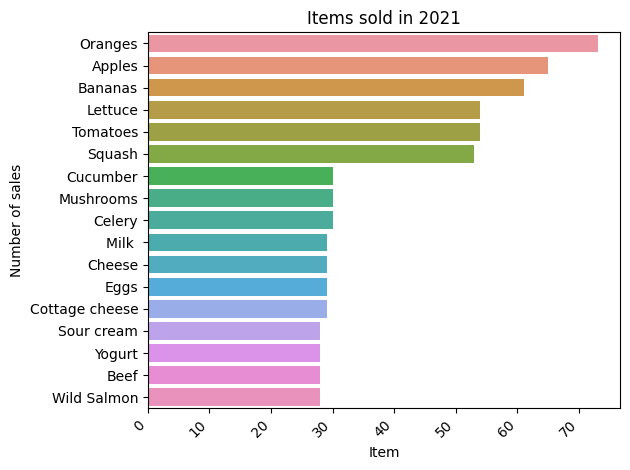

In [ ]:
# Create the bar chart using Seaborn
sns.barplot(x = item_2021['Item'],y = item_2021['index'],data = df)
# Set labels and title
plt.xlabel('Item')
plt.ylabel('Number of sales')
plt.title('Items sold in 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the chart
plt.show()


Same convention as of the data of 2021.